TypeError: RegularPolygon.__init__() takes 3 positional arguments but 4 were given

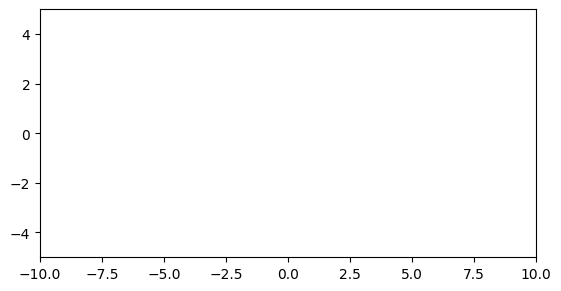

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import RegularPolygon

# --- Ship Definitions ---
black_pearl_pos = [0, 0]  # Initial position of the Black Pearl
flying_dutchman_pos = [5, 0]  # Initial position of the Flying Dutchman

# --- Plotting Setup ---
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)  # Adjust x-axis limits as needed
ax.set_ylim(-5, 5)   # Adjust y-axis limits as needed
ax.set_aspect('equal')  # Ensure ships appear with correct proportions

# --- Ship Representations ---
black_pearl = RegularPolygon(black_pearl_pos, 11, 0.5, fc='gray', label="Black Pearl")
flying_dutchman = RegularPolygon(flying_dutchman_pos, 7, 1, fc='black', alpha=0.5, label="Flying Dutchman")

# Add ships to the plot
ax.add_patch(black_pearl)
ax.add_patch(flying_dutchman)
ax.legend()  # Add labels to the plot

# Display the plot
plt.show()

RuntimeError: The animation function must return a sequence of Artist objects.

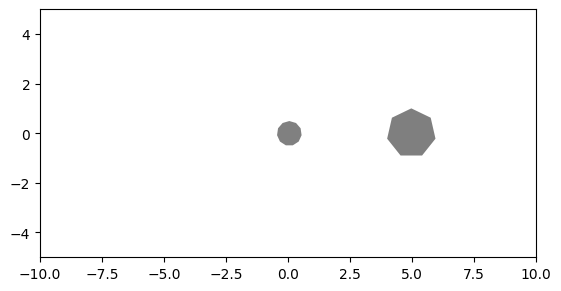

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.patches import RegularPolygon

# --- Ship Definitions ---
black_pearl_pos = [0, 0]  # Initial position
flying_dutchman_pos = [5, 0]  # Initial position

# --- Animation Setup ---
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)  # Adjust x-axis limits as needed
ax.set_ylim(-5, 5)   # Adjust y-axis limits as needed
ax.set_aspect('equal')  # Ensure ships appear with correct proportions

# --- Animation Function ---
def animate(i):
  global black_pearl_pos, flying_dutchman_pos

  # Remove previous patches (optional for better performance)
  for p in ax.patches[:]:
      p.remove()

  # Black Pearl - Create new cyclogon with rotation
  num_vertices_bp = 11  # Number of vertices (sides) for Black Pearl
  radius_bp = 0.5
  angle_offset_bp = i * 0.01  # Adjust for rotation speed
  black_pearl = RegularPolygon(xy=black_pearl_pos, numVertices=num_vertices_bp, radius=radius_bp, orientation=angle_offset_bp, fc='gray', label="Black Pearl")
  ax.add_patch(black_pearl)

  # Flying Dutchman - Create new cyclogon with rotation
  num_vertices_fd = 7  # Number of vertices (sides) for Flying Dutchman
  radius_fd = 1
  angle_offset_fd = -i * 0.02  # Adjust for rotation speed (opposite direction)
  flying_dutchman = RegularPolygon(xy=flying_dutchman_pos, numVertices=num_vertices_fd, radius=radius_fd, orientation=angle_offset_fd, fc='black', alpha=0.5, label="Flying Dutchman")
  ax.add_patch(flying_dutchman)

  # Update ship positions for next frame
  black_pearl_pos[0] += 0.02 + np.random.rand() * 0.05  # Adjust speed and add randomness
  black_pearl_pos[1] += np.random.rand() * 0.02 - 0.01  # Add some random y-movement

  flying_dutchman_pos[0] -= 0.03 + np.random.rand() * 0.05
  flying_dutchman_pos[1] += np.random.rand() * 0.03 - 0.015

  return [],  # No return objects are needed as patches are recreated each frame

# Create and display the animation
anim = animation.FuncAnimation(fig, animate, frames=200, interval=20, blit=True)
plt.show()

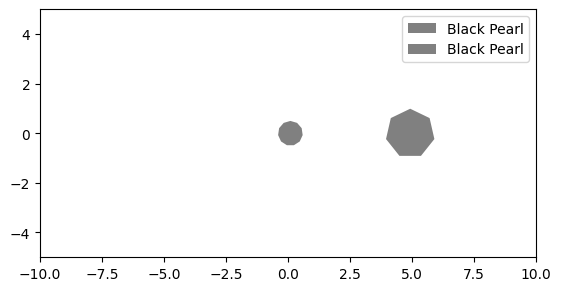

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.patches import RegularPolygon

# --- Ship Definitions ---
black_pearl_pos = [0, 0]  # Initial position of the Black Pearl
flying_dutchman_pos = [5, 0]  # Initial position of the Flying Dutchman

# --- Animation Setup ---
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)  # Adjust x-axis limits as needed
ax.set_ylim(-5, 5)   # Adjust y-axis limits as needed
ax.set_aspect('equal')  # Ensure ships appear with correct proportions

# --- Ship Representations ---
#black_pearl = RegularPolygon(black_pearl_pos, 11, 0.5, fc='gray', label="Black Pearl")  # Black Pearl as a flentalgon
black_pearl = RegularPolygon(black_pearl_pos, 11, radius=0.5, fc='gray', label="Black Pearl")  # Corrected line
flying_dutchman_pos = [5, 0]  # Initial position of the Flying Dutchman
flying_dutchman = RegularPolygon(flying_dutchman_pos, 7, radius=1, fc='gray', label="Black Pearl")  # Corrected line#
#flying_dutchman = RegularPolygon(flying_dutchman_pos, 7, 1, fc='black', alpha=0.5, label="Cyclone")  # Flying Dutchman as a heptagon

# Add ships to the plot
ax.add_patch(black_pearl)
ax.add_patch(flying_dutchman)
ax.legend()  # Add labels to the plot

# --- Animation Function ---
def animate(i):
    global black_pearl_pos, flying_dutchman_pos

    # Random adjustments for both ships
    black_pearl_pos[0] += 0.02 + np.random.rand() * 0.05  # Adjust speed and add randomness
    black_pearl_pos[1] += np.random.rand() * 0.02 - 0.01  # Add some random y-movement

    flying_dutchman_pos[0] -= 0.03 + np.random.rand() * 0.05
    flying_dutchman_pos[1] += np.random.rand() * 0.03 - 0.015

    # Update ship positions
    black_pearl.center = black_pearl_pos
    flying_dutchman.center = flying_dutchman_pos

    return black_pearl, flying_dutchman

# Create and display the animation
anim = animation.FuncAnimation(fig, animate, frames=200, interval=20, blit=True)
plt.show()

NameError: name 'matplotlib' is not defined

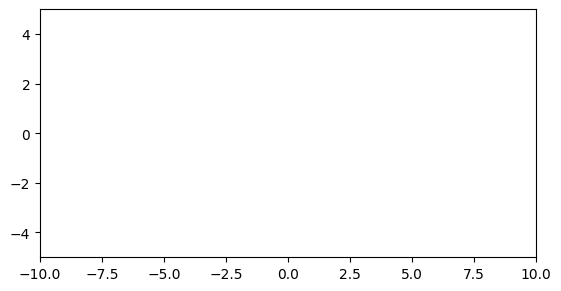

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

# --- Ship Definitions ---
black_pearl_pos = [0, 0]  # Initial position of the Black Pearl (center of cyclogon)
flying_dutchman_pos = [5, 0]  # Initial position of the Flying Dutchman

# --- Animation Setup ---
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)  # Adjust x-axis limits as needed
ax.set_ylim(-5, 5)   # Adjust y-axis limits as needed
ax.set_aspect('equal')  # Ensure ships appear with correct proportions

# --- Black Pearl Cyclogon Definition ---
class BlackPearlCyclogon(matplotlib.patches.RegularPolygon):
  def __init__(self, center, num_vertices=5, radius=1):
    super().__init__(xy=center, numVertices=num_vertices, radius=radius)
    self.center = center

  def update_center(self, new_center):
    self._xy = new_center

# Create Black Pearl cyclogon object
black_pearl = BlackPearlCyclogon(black_pearl_pos, num_vertices=5, radius=0.5)
ax.add_artist(black_pearl)
flying_dutchman = Rectangle(flying_dutchman_pos, 3, 1.5, fc='black', alpha=0.5, label="Flying Dutchman")  # Simplified representation

# --- Animation Function ---
def animate(i):
  global black_pearl_pos, flying_dutchman_pos

  # Random adjustments within a range (-0.1, 0.1) for both ships
  x_adjust_bp = np.random.rand() * 2 - .1  # Black Pearl x-adjustment
  y_adjust_bp = np.random.rand() * 1 - 0.5  # Black Pearl y-adjustment
  x_adjust_fd = np.random.rand() * 2 - 0.1  # Flying Dutchman x-adjustment
  y_adjust_fd = np.random.rand() * 1 - 0.05  # Flying Dutchman y-adjustment

  # Update positions with adjustments
  black_pearl_pos[0] += 0.05 + x_adjust_bp
  black_pearl_pos[1] += y_adjust_bp
  flying_dutchman_pos[0] -= 0.03 + x_adjust_fd
  flying_dutchman_pos[1] += y_adjust_fd

  # Wrap around if ships go out of bounds (optional)
  if black_pearl_pos[0] < ax.get_xlim()[0]:
      black_pearl_pos[0] = ax.get_xlim()[1]
  elif black_pearl_pos[0] > ax.get_xlim()[1]:
      black_pearl_pos[0] = ax.get_xlim()[0]
  if flying_dutchman_pos[0] < ax.get_xlim()[0]:
      flying_dutchman_pos[0] = ax.get_xlim()[1]
  elif flying_dutchman_pos[0] > ax.get_xlim()[1]:
      flying_dutchman_pos[0] = ax.get_xlim()[0]

  # Update ship positions
  black_pearl.update_center(black_pearl_pos)
  flying_dutchman.set_xy(flying_dutchman_pos)

  return black_pearl, flying_dutchman

# Create and display the animation
anim = animation.FuncAnimation(fig, animate, frames=200, interval=20, blit=True)
plt.show()

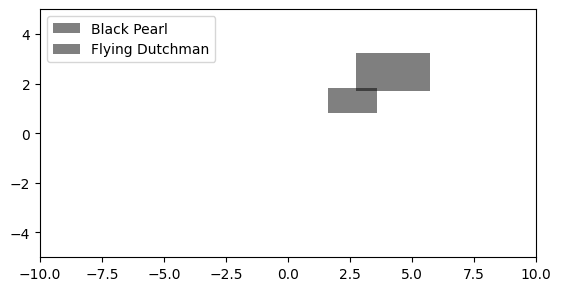

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.patches import Rectangle

# --- Ship Definitions ---
black_pearl_pos = [0, 0]  # Initial position of the Black Pearl
flying_dutchman_pos = [5, 0]  # Initial position of the Flying Dutchman

# --- Animation Setup ---
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)  # Adjust x-axis limits as needed
ax.set_ylim(-5, 5)   # Adjust y-axis limits as needed
ax.set_aspect('equal')  # Ensure ships appear with correct proportions

# --- Ship Representations (using Rectangle for simplicity)---
black_pearl = Rectangle(black_pearl_pos, 2, 1, fc='gray', label="Black Pearl")  # Simplified ship representation
flying_dutchman = Rectangle(flying_dutchman_pos, 3, 1.5, fc='black', alpha=0.5, label="Flying Dutchman")  # Simplified ship representation

# Add ships to the plot with labels
ax.add_patch(black_pearl)
ax.add_patch(flying_dutchman)
ax.legend()  # Add labels to the plot

# --- Animation Function ---
def animate(i):
    global black_pearl_pos, flying_dutchman_pos

    # Random adjustments within a range (-0.1, 0.1) for both ships
    x_adjust_bp = np.random.rand() * 2 - .1  # Black Pearl x-adjustment
    y_adjust_bp = np.random.rand() * 1 - 0.5  # Black Pearl y-adjustment
    x_adjust_fd = np.random.rand() * 2 - 0.1  # Flying Dutchman x-adjustment
    y_adjust_fd = np.random.rand() * 1 - 0.05  # Flying Dutchman y-adjustment

    # Update positions with adjustments
    black_pearl_pos[0] += 0.05 + x_adjust_bp
    black_pearl_pos[1] += y_adjust_bp
    flying_dutchman_pos[0] -= 0.03 + x_adjust_fd
    flying_dutchman_pos[1] += y_adjust_fd

    # Wrap around if ships go out of bounds (optional)
    if black_pearl_pos[0] < ax.get_xlim()[0]:
        black_pearl_pos[0] = ax.get_xlim()[1]
    elif black_pearl_pos[0] > ax.get_xlim()[1]:
        black_pearl_pos[0] = ax.get_xlim()[0]
    if flying_dutchman_pos[0] < ax.get_xlim()[0]:
        flying_dutchman_pos[0] = ax.get_xlim()[1]
    elif flying_dutchman_pos[0] > ax.get_xlim()[1]:
        flying_dutchman_pos[0] = ax.get_xlim()[0]

    # Update ship positions
    black_pearl.set_xy(black_pearl_pos)
    flying_dutchman.set_xy(flying_dutchman_pos)

    return black_pearl, flying_dutchman

# Create and display the animation
anim = animation.FuncAnimation(fig, animate, frames=200, interval=20, blit=True)
plt.show()

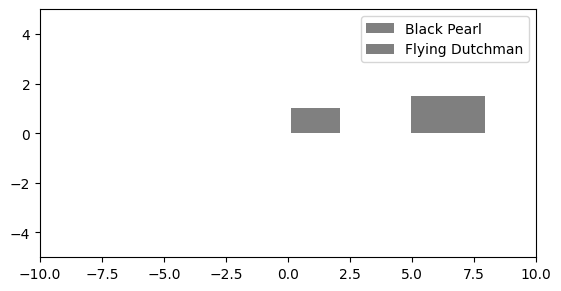

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.patches import Rectangle

# --- Ship Definitions ---
black_pearl_pos = [0, 0]  # Initial position of the Black Pearl
flying_dutchman_pos = [5, 0]  # Initial position of the Flying Dutchman

# --- Animation Setup ---
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)  # Adjust x-axis limits as needed
ax.set_ylim(-5, 5)   # Adjust y-axis limits as needed
ax.set_aspect('equal')  # Ensure ships appear with correct proportions

# --- Ship Representations (using Rectangle for simplicity)---
black_pearl = Rectangle(black_pearl_pos, 2, 1, fc='gray', label="Black Pearl")  # Simplified ship representation
flying_dutchman = Rectangle(flying_dutchman_pos, 3, 1.5, fc='black', alpha=0.5, label="Flying Dutchman")  # Simplified ship representation

# Add ships to the plot with labels
ax.add_patch(black_pearl)
ax.add_patch(flying_dutchman)
ax.legend()  # Add labels to the plot

# --- Animation Function ---
def animate(i):
    global black_pearl_pos, flying_dutchman_pos

    # Simple movement (adjust as needed)
    black_pearl_pos[0] += 0.05  # Move Black Pearl to the right
    flying_dutchman_pos[0] -= 0.03  # Move Flying Dutchman to the left

    # Update ship positions
    black_pearl.set_xy(black_pearl_pos)
    flying_dutchman.set_xy(flying_dutchman_pos)

    return black_pearl, flying_dutchman

# Create and display the animation
anim = animation.FuncAnimation(fig, animate, frames=200, interval=20, blit=True)
plt.show()

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.patches import Rectangle, Circle

# --- Ship Definitions ---
black_pearl_pos = [0, 0]  # Initial position of the Black Pearl
flying_dutchman_pos = [5, 0]  # Initial position of the Flying Dutchman

# --- Animation Setup ---
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)  # Adjust x-axis limits as needed
ax.set_ylim(-5, 5)   # Adjust y-axis limits as needed
ax.set_aspect('equal')  # Ensure ships appear with correct proportions

# --- Ship Representations ---
black_pearl = Rectangle(black_pearl_pos, 2, 1, fc='gray')  # Simplified ship representation
flying_dutchman = Rectangle(flying_dutchman_pos, 3, 1.5, fc='black', alpha=0.5)  # Simplified ship representation

# Add ships to the plot
ax.add_patch(black_pearl)
ax.add_patch(flying_dutchman)

# --- Animation Function ---
#def animate(i):
def animate(i):
    t = i / 100  # Adjust speed with this factor
    x = t * np.cos(t)  # Cyclogon x-coordinate
    y = t * np.sin(t)  # Cyclogon y-coordinate
    point.set_data([x], [y])
    con.xy1 = x, y
python
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.patches import Rectangle, Circle

# --- Ship Definitions ---
black_pearl_pos = [0, 0]  # Initial position of the Black Pearl
flying_dutchman_pos = [5, 0]  # Initial position of the Flying Dutchman

# --- Animation Setup ---
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)  # Adjust x-axis limits as needed
ax.set_ylim(-5, 5)   # Adjust y-axis limits as needed
ax.set_aspect('equal')  # Ensure ships appear with correct proportions

# --- Ship Representations ---
black_pearl = Rectangle(black_pearl_pos, 2, 1, fc='gray')  # Simplified ship representation
flying_dutchman = Rectangle(flying_dutchman_pos, 3, 1.5, fc='black', alpha=0.5)  # Simplified ship representation

# Add ships to the plot
ax.add_patch(black_pearl)
ax.add_patch(flying_dutchman)

# --- Animation Function ---
def animate(i):
    global black_pearl_pos, flying_dutchman_pos

    # Simple movement (adjust as needed)
    black_pearl_pos[0] += 0.05  # Move Black Pearl to the right
    flying_dutchman_pos[0] -= 0.03  # Move Flying Dutchman to the left

    # Update ship positions
    black_pearl.set_xy(black_pearl_pos)
    flying_dutchman.set_xy(flying_dutchman_pos)

    return black_pearl, flying_dutchman

# Create and display the animation
anim = animation.FuncAnimation(fig, animate, frames=200, interval=20, blit=False)
python
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.patches import Rectangle, Circle

# --- Ship Definitions ---
black_pearl_pos = [0, 0]  # Initial position of the Black Pearl
flying_dutchman_pos = [5, 0]  # Initial position of the Flying Dutchman

# --- Animation Setup ---
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)  # Adjust x-axis limits as needed
ax.set_ylim(-5, 5)   # Adjust y-axis limits as needed
ax.set_aspect('equal')  # Ensure ships appear with correct proportions

# --- Ship Representations ---
black_pearl = Rectangle(black_pearl_pos, 2, 1, fc='gray')  # Simplified ship representation
flying_dutchman = Rectangle(flying_dutchman_pos, 3, 1.5, fc='black', alpha=0.5)  # Simplified ship representation

# Add ships to the plot
ax.add_patch(black_pearl)
ax.add_patch(flying_dutchman)

# --- Animation Function ---
def animate(i):
    global black_pearl_pos, flying_dutchman_pos

    # Simple movement (adjust as needed)
    black_pearl_pos[0] += 0.05  # Move Black Pearl to the right
    flying_dutchman_pos[0] -= 0.03  # Move Flying Dutchman to the left

    # Update ship positions
    black_pearl.set_xy(black_pearl_pos)
    flying_dutchman.set_xy(flying_dutchman_pos)

    return black_pearl, flying_dutchman

```python
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.patches import Rectangle, Circle

# --- Ship Definitions ---
black_pearl_pos = [0, 0]  # Initial position of the Black Pearl
flying_dutchman_pos = [5, 0]  # Initial position of the Flying Dutchman

# --- Animation Setup ---
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)  # Adjust x-axis limits as needed
ax.set_ylim(-5, 5)   # Adjust y-axis limits as needed
ax.set_aspect('equal')  # Ensure ships appear with correct proportions

# --- Ship Representations ---
black_pearl = Rectangle(black_pearl_pos, 2, 1, fc='gray')  # Simplified ship representation
flying_dutchman = Rectangle(flying_dutchman_pos, 3, 1.5, fc='black', alpha=0.5)  # Simplified ship representation

# Add ships to the plot
ax.add_patch(black_pearl)
ax.add_patch(flying_dutchman)

# --- Animation Function ---
def animate(i):
    global black_pearl_pos, flying_dutchman_pos

    # Simple movement (adjust as needed)
    black_pearl_pos[0] += 0.05  # Move Black Pearl to the right
    flying_dutchman_pos[0] -= 0.03  # Move Flying Dutchman to the left

    # Update ship positions
    black_pearl.set_xy(black_pearl_pos)
    flying_dutchman.set_xy(flying_dutchman_pos)

    return black_pearl, flying_dutchman

# Create and display the animation
anim = animation.FuncAnimation(fig, animate, frames=200, interval=20, blit=False)
plt.show()
```
import matplotlib.animation as animation
from matplotlib.patches import Rectangle, Circle

# --- Ship Definitions ---
black_pearl_pos = [0, 0]  # Initial position of the Black Pearl
flying_dutchman_pos = [5, 0]  # Initial position of the Flying Dutchman

# --- Animation Setup ---
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)  # Adjust x-axis limits as needed
ax.set_ylim(-5, 5)   # Adjust y-axis limits as needed
ax.set_aspect('equal')  # Ensure ships appear with correct proportions

# --- Ship Representations ---
black_pearl = Rectangle(black_pearl_pos, 2, 1, fc='gray')  # Simplified ship representation
flying_dutchman = Rectangle(flying_dutchman_pos, 3, 1.5, fc='black', alpha=0.5)  # Simplified ship representation

# Add ships to the plot
ax.add_patch(black_pearl)
ax.add_patch(flying_dutchman)

# --- Animation Function ---
def animate(i):
    global black_pearl_pos, flying_dutchman_pos

    # Simple movement (adjust as needed)
    black_pearl_pos[0] += 0.05  # Move Black Pearl to the right
    flying_dutchman_pos[0] -= 0.03  # Move Flying Dutchman to the left

    # Update ship positions
    black_pearl.set_xy(black_pearl_pos)
    flying_dutchman.set_xy(flying_dutchman_pos)

    return black_pearl, flying_dutchman

# Create and display the animation
anim = animation.FuncAnimation(fig, animate, frames=200, interval=20, blit=False)
plt.show()
```

global black_pearl_pos, flying_dutchman_pos
    # Simple movement (adjust as needed)
    black_pearl_pos[0] += 0.05  # Move Black Pearl to the right
    flying_dutchman_pos[0] -= 0.03  # Move Flying Dutchman to the left

    # Update ship positions
    black_pearl.set_xy(black_pearl_pos)
    flying_dutchman.set_xy(flying_dutchman_pos)

    return black_pearl, flying_dutchman

# Create and display the animation
anim = animation.FuncAnimation(fig, animate, frames=200, interval=20, blit=False)
plt.show()

SyntaxError: invalid syntax (<ipython-input-35-96ae9cf8bcd9>, line 110)